In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='c6683211-74b1-4a3f-99ca-a1d589295ccd', project_access_token='p-ca3fa98850c0ed469684a4c1dea2fc8a6bfb3fb7')
pc = project.project_context


# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - ANAHUAC

### Introducción

En este desafio, usted usará herramientas de IBM como Watson Studio (o Cloud Pak for Data) para construir un modelo baseado en Machine Learning capaz de preveer si un estudante irá continuar o abandonará su curso.

<hr>

## Installing Libs

In [2]:
!pip install scikit-learn --upgrade

     |████████████████████████████████| 6.8MB 9.5MB/s eta 0:00:01
     |████████████████████████████████| 307kB 50.6MB/s eta 0:00:01
ERROR: autoai-libs 1.10.5 has requirement numpy>=1.16.4, but you'll have numpy 1.15.4 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement pandas>=0.24.2, but you'll have pandas 0.24.1 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement scikit-learn==0.20.3, but you'll have scikit-learn 0.23.2 which is incompatible.
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


In [3]:
!pip install xgboost --upgrade

     |████████████████████████████████| 148.9MB 239kB/s  eta 0:00:01    |██████▌                         | 30.2MB 23.9MB/s eta 0:00:05     |██████████████████▏             | 84.7MB 24.7MB/s eta 0:00:03     |██████████████████▊             | 87.1MB 24.7MB/s eta 0:00:03     |███████████████████████████████▏| 144.9MB 37.0MB/s eta 0:00:01


<hr>

## Loading the .csv dataset from GitHub

In [4]:
import pandas as pd

In [5]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/ForTraining.csv
df_base_for_training = pd.read_csv(r'ForTraining.csv')
df_base_for_training.head()

--2020-09-18 13:20:13--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/ForTraining.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92376 (90K) [text/plain]
Saving to: ‘ForTraining.csv’

100%[======================================>] 92,376      --.-K/s   in 0.005s  

2020-09-18 13:20:13 (18.9 MB/s) - ‘ForTraining.csv’ saved [92376/92376]



,studentId,reducido,ciclo,Graduado
0,88588.0,Interv. Edu.,2019 - 08,No
1,81135.0,Educacion,2019 - 05,Si
2,80926.0,Direc. Estrat. Neg,2019 - 05,Si
3,82415.0,B. I.,2019 - 06,Si
4,90082.0,Est. Temprana,2019 - 08,No


In [6]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/OrdenMaterias.csv
df_orden_materias = pd.read_csv(r'OrdenMaterias.csv')
df_orden_materias.head()

--2020-09-18 13:20:14--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/OrdenMaterias.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63920 (62K) [text/plain]
Saving to: ‘OrdenMaterias.csv’

100%[======================================>] 63,920      --.-K/s   in 0.003s  

2020-09-18 13:20:14 (17.7 MB/s) - ‘OrdenMaterias.csv’ saved [63920/63920]



,reducido,2017 - 03,2017 - 04,2017 - 05,2017 - 06,2017 - 07,2017 - 08,2018 - 01,2018 - 02,2018 - 03,...,2019 - 05,2019 - 06,2019 - 07,2019 - 08,2020 - 01,2020 - 02,2020 - 03,2020 - 04,2020 - 05,2020 - 06
0,Act. Derecho Contratual,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Sin clase,Sin clase,Sin clase,Sin clase,Consentimiento y objeto digital contractual,Métodos alternos de resolución de controversias,Nueva clasificación contractual,Nuevo derecho probatorio documental,Contratos inteligentes,Consentimiento y objeto digital contractual
1,Adm. Emp.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...
2,Adm. Riesgos,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones
3,Adm. Salud,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Calidad en salud,Contabilidad Financiera y Presupuestos,Administración de costos,Salud pública,Planeación estratégica en salud,Calidad en salud,Contabilidad Financiera y Presupuestos,Planeación estratégica en salud,Salud pública,Planeación estratégica en salud
4,Admon Fin.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...


In [7]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaConexiones.csv
df_tabla_conexiones = pd.read_csv(r'TablaConexiones.csv')
df_tabla_conexiones.head()

--2020-09-18 13:20:16--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaConexiones.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243492 (238K) [text/plain]
Saving to: ‘TablaConexiones.csv’

100%[======================================>] 243,492     --.-K/s   in 0.01s   

2020-09-18 13:20:16 (21.0 MB/s) - ‘TablaConexiones.csv’ saved [243492/243492]



,studentId,ciclo,Dias_Conectado,Minutos_Promedio,Minutos_Total
0,45870,2017 - 03,10.0,76.957000,769.57
1,45898,2017 - 03,32.0,370.231250,11847.40
2,45905,2017 - 03,50.0,198.717400,9935.87
3,45931,2017 - 03,22.0,294.535909,6479.79
4,45933,2017 - 03,18.0,177.991667,3203.85


In [8]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaTareas.csv
df_tabla_tareas = pd.read_csv(r'TablaTareas.csv')
df_tabla_tareas.head()

--2020-09-18 13:20:17--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaTareas.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 310923 (304K) [text/plain]
Saving to: ‘TablaTareas.csv’

100%[======================================>] 310,923     --.-K/s   in 0.01s   

2020-09-18 13:20:17 (22.6 MB/s) - ‘TablaTareas.csv’ saved [310923/310923]



,studentId,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas
0,81328.0,2019 - 05,99.000000,10.0,0.0,0.0,10.0
1,99206.0,2020 - 02,80.777500,10.0,2.0,0.0,12.0
2,94582.0,2020 - 01,79.666000,10.0,0.0,0.0,10.0
3,87564.0,2019 - 07,0.000000,0.0,15.0,0.0,15.0
4,87971.0,2019 - 08,36.363636,5.0,6.0,0.0,11.0


In [9]:
print("Columnas en *df_base_for_training*:")
print(df_base_for_training.columns)

print("\Columnas en *df_orden_materias*:")
print(df_orden_materias.columns)

print("\Columnas en *df_tabla_conexiones*:")
print(df_tabla_conexiones.columns)

print("\Columnas en *df_tabla_tareas*:")
print(df_tabla_tareas.columns)

Columnas en *df_base_for_training*:
Index(['studentId', 'reducido', 'ciclo', 'Graduado'], dtype='object')
\Columnas en *df_orden_materias*:
Index(['reducido', '2017 - 03', '2017 - 04', '2017 - 05', '2017 - 06',
       '2017 - 07', '2017 - 08', '2018 - 01', '2018 - 02', '2018 - 03',
       '2018 - 04', '2018 - 05', '2018 - 06', '2018 - 07', '2018 - 08',
       '2019 - 01', '2019 - 02', '2019 - 03', '2019 - 04', '2019 - 05',
       '2019 - 06', '2019 - 07', '2019 - 08', '2020 - 01', '2020 - 02',
       '2020 - 03', '2020 - 04', '2020 - 05', '2020 - 06'],
      dtype='object')
\Columnas en *df_tabla_conexiones*:
Index(['studentId', 'ciclo', 'Dias_Conectado', 'Minutos_Promedio',
       'Minutos_Total'],
      dtype='object')
\Columnas en *df_tabla_tareas*:
Index(['studentId', 'ciclo', 'Calificacion_Promedio', 'Tareas_Puntuales',
       'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas'],
      dtype='object')


#### ¡ATENCIÓN! La columna **target** es  ``Graduado``, presente en el DataFrame "df_base_for_training".

<hr>

## Uniendo DataFrames en Pandas

Documentación oficial para Pandas 1.1.0: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

Como un **ejemplo** de como usar Pandas, camos a unir/merge la información de las tablas "df_base_for_training" y "df_tabla_tareas" a traves de la llave ``studentId``.

Usted puee editar el dataframes manualmente si lo prefiere, usando Microsoft Excel u otros lenguajes. Recuerde insertar la data procesada en IBM Cloud Pak for Data para que pueda entrenar su modelo.

In [10]:
df_base_for_training.tail()

,studentId,reducido,ciclo,Graduado
2495,89685.0,Estrat. Comercial,2019 - 08,No
2496,77590.0,Crianza Hijos,2019 - 06,Si
2497,57623.0,Mercadotecnia,2018 - 02,Si
2498,50018.0,Lider. Inst. Edu.,2017 - 05,No
2499,88250.0,Prof. Deportiva.,2019 - 08,No


In [11]:
df_tabla_tareas.tail()

,studentId,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas
6293,80467.0,2019 - 05,20.000000,1.0,4.0,0.0,5.0
6294,80249.0,2019 - 05,50.600000,3.0,2.0,0.0,5.0
6295,85857.0,2019 - 07,81.428571,13.0,1.0,0.0,14.0
6296,98880.0,2020 - 02,91.212727,11.0,0.0,0.0,11.0
6297,71859.0,2019 - 02,87.333000,10.0,0.0,0.0,10.0


In [12]:
# El resultado de esta celda sera la union de los dos anteriores dataframes
# usando la columna ``studentId`` como llave.

df = pd.merge(
    df_base_for_training, df_tabla_tareas, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)
df.tail()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas
2495,91320.0,Adm. Emp.,2019 - 08,No,71.818182,9.0,2.0,0.0,11.0
2496,91330.0,I. A.,2019 - 08,Si,81.333333,15.0,0.0,0.0,15.0
2497,91331.0,Gest. Esc.,2019 - 08,No,73.333333,9.0,0.0,0.0,9.0
2498,91335.0,Gest. Esc.,2019 - 08,Si,85.185556,9.0,0.0,0.0,9.0
2499,91346.0,Psicopat. Adol.,2019 - 08,No,80.159333,15.0,0.0,0.0,15.0


In [13]:

df = pd.merge(
    df, df_tabla_conexiones, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)
df.tail()


,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total
2495,91320.0,Adm. Emp.,2019 - 08,No,71.818182,9.0,2.0,0.0,11.0,21.0,468.019048,9828.40
2496,91330.0,I. A.,2019 - 08,Si,81.333333,15.0,0.0,0.0,15.0,90.0,431.348000,38821.32
2497,91331.0,Gest. Esc.,2019 - 08,No,73.333333,9.0,0.0,0.0,9.0,27.0,171.675926,4635.25
2498,91335.0,Gest. Esc.,2019 - 08,Si,85.185556,9.0,0.0,0.0,9.0,102.0,256.105686,26122.78
2499,91346.0,Psicopat. Adol.,2019 - 08,No,80.159333,15.0,0.0,0.0,15.0,26.0,230.841538,6001.88


In [14]:
# Información acerca de las columnas del dataset unido
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 12 columns):
studentId                2500 non-null float64
reducido                 2500 non-null object
ciclo                    2500 non-null object
Graduado                 2500 non-null object
Calificacion_Promedio    2500 non-null float64
Tareas_Puntuales         2500 non-null float64
Tareas_No_Entregadas     2500 non-null float64
Tareas_Retrasadas        2500 non-null float64
Total_Tareas             2500 non-null float64
Dias_Conectado           2500 non-null float64
Minutos_Promedio         2500 non-null float64
Minutos_Total            2500 non-null float64
dtypes: float64(9), object(3)
memory usage: 253.9+ KB


De la información de arriba ud puede observar que hay valores Null/NaN en algunas de las columnas.

Para que nuestro modelo quede bien entrenado necesitamos procesar estos valores nulos de una forma adecuada.

Usted escogera la mejor estrategia como parte del desafío, pero en la siguiente celda encuentra un **ejemplo** the como puede hacer este procesamiento usanto la libreria *scikit-learn*.

<hr>

## Pre-procesando el dataset antes de entrenar

In [15]:
# Aplicando la función para borrar todas las filas con valor NaN en la columna ``Graduado``:
df2 = df.copy()

### Eliminando columnas no desadas

Vamos a **demostrar** acontinuación como usar el metodo DataFrame.drop().

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [16]:
df2.tail()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total
2495,91320.0,Adm. Emp.,2019 - 08,No,71.818182,9.0,2.0,0.0,11.0,21.0,468.019048,9828.40
2496,91330.0,I. A.,2019 - 08,Si,81.333333,15.0,0.0,0.0,15.0,90.0,431.348000,38821.32
2497,91331.0,Gest. Esc.,2019 - 08,No,73.333333,9.0,0.0,0.0,9.0,27.0,171.675926,4635.25
2498,91335.0,Gest. Esc.,2019 - 08,Si,85.185556,9.0,0.0,0.0,9.0,102.0,256.105686,26122.78
2499,91346.0,Psicopat. Adol.,2019 - 08,No,80.159333,15.0,0.0,0.0,15.0,26.0,230.841538,6001.88


In [53]:
df2.shape

(2500, 14)

In [17]:
df_orden_materias.head()

,reducido,2017 - 03,2017 - 04,2017 - 05,2017 - 06,2017 - 07,2017 - 08,2018 - 01,2018 - 02,2018 - 03,...,2019 - 05,2019 - 06,2019 - 07,2019 - 08,2020 - 01,2020 - 02,2020 - 03,2020 - 04,2020 - 05,2020 - 06
0,Act. Derecho Contratual,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Sin clase,Sin clase,Sin clase,Sin clase,Consentimiento y objeto digital contractual,Métodos alternos de resolución de controversias,Nueva clasificación contractual,Nuevo derecho probatorio documental,Contratos inteligentes,Consentimiento y objeto digital contractual
1,Adm. Emp.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...
2,Adm. Riesgos,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones
3,Adm. Salud,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Calidad en salud,Contabilidad Financiera y Presupuestos,Administración de costos,Salud pública,Planeación estratégica en salud,Calidad en salud,Contabilidad Financiera y Presupuestos,Planeación estratégica en salud,Salud pública,Planeación estratégica en salud
4,Admon Fin.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...


In [18]:
def getMateria(X):
    r=X.reducido
    c=X.ciclo
    

In [ ]:
df2 = df.drop(columns=['reducido'], inplace=False)

## Correlaciones para borrar tablas

In [19]:
import numpy as np

def ciclo(X):
    x = int(X[0:4])
    y = int(X[7:])
    return [x,y]
ns = []
for x in df2["ciclo"]:
    ns.append(ciclo(x))
data = np.array(ns)
dataset = pd.DataFrame({'Año': data[:, 0], 'Mes': data[:, 1]})


In [20]:
df2["Año"] = dataset["Año"]
df2["Mes"] = dataset["Mes"]
df2.head()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,Año,Mes
0,45898.0,Mercadotecnia,2017 - 03,Si,65.598667,13.0,2.0,0.0,15.0,32.0,370.231250,11847.40,2017,3
1,45905.0,Intro. Fin,2017 - 03,No,86.482222,9.0,0.0,0.0,9.0,50.0,198.717400,9935.87,2017,3
2,45931.0,Direc. Proy.,2017 - 03,No,63.196667,12.0,2.0,1.0,15.0,22.0,294.535909,6479.79,2017,3
3,46063.0,Comp. Dig. Docentes,2017 - 03,Si,84.988333,8.0,0.0,4.0,12.0,29.0,471.421379,13671.22,2017,3
4,46106.0,Gest. Esc.,2017 - 03,Si,68.542667,11.0,3.0,1.0,15.0,31.0,306.023226,9486.72,2017,3


In [21]:
df_corr = df2.copy()
df_corr.head()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,Año,Mes
0,45898.0,Mercadotecnia,2017 - 03,Si,65.598667,13.0,2.0,0.0,15.0,32.0,370.231250,11847.40,2017,3
1,45905.0,Intro. Fin,2017 - 03,No,86.482222,9.0,0.0,0.0,9.0,50.0,198.717400,9935.87,2017,3
2,45931.0,Direc. Proy.,2017 - 03,No,63.196667,12.0,2.0,1.0,15.0,22.0,294.535909,6479.79,2017,3
3,46063.0,Comp. Dig. Docentes,2017 - 03,Si,84.988333,8.0,0.0,4.0,12.0,29.0,471.421379,13671.22,2017,3
4,46106.0,Gest. Esc.,2017 - 03,Si,68.542667,11.0,3.0,1.0,15.0,31.0,306.023226,9486.72,2017,3


In [22]:
#df_corr["ciclo"] = df_corr["ciclo"].astype('category').cat.codes
df_corr["Target"]=df_corr["Graduado"].astype('category').cat.codes
df_corr.corr()

,studentId,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,Año,Mes,Target
studentId,1.000000,-0.049733,0.126837,0.080885,-0.054803,0.245032,-0.057277,0.061247,-0.019403,0.855830,0.438409,-0.061640
Calificacion_Promedio,-0.049733,1.000000,0.753701,-0.898513,-0.062307,-0.110413,0.588409,0.038412,0.476329,-0.030236,-0.053610,0.552986
Tareas_Puntuales,0.126837,0.753701,1.000000,-0.662619,-0.138629,0.464040,0.462821,0.132107,0.451852,0.120883,0.021696,0.427524
Tareas_No_Entregadas,0.080885,-0.898513,-0.662619,1.000000,0.031142,0.338991,-0.517712,-0.024078,-0.412987,0.069414,0.045285,-0.468256
Tareas_Retrasadas,-0.054803,-0.062307,-0.138629,0.031142,1.000000,0.062143,-0.084809,0.022031,-0.056462,-0.056421,-0.016691,-0.100684
Total_Tareas,0.245032,-0.110413,0.464040,0.338991,0.062143,1.000000,-0.037221,0.143959,0.077542,0.223673,0.077369,-0.027177
Dias_Conectado,-0.057277,0.588409,0.462821,-0.517712,-0.084809,-0.037221,1.000000,-0.108876,0.766813,-0.022317,-0.059949,0.597712
Minutos_Promedio,0.061247,0.038412,0.132107,-0.024078,0.022031,0.143959,-0.108876,1.000000,0.419386,0.042163,0.021863,-0.096152
Minutos_Total,-0.019403,0.476329,0.451852,-0.412987,-0.056462,0.077542,0.766813,0.419386,1.000000,0.000568,-0.041540,0.414510
Año,0.855830,-0.030236,0.120883,0.069414,-0.056421,0.223673,-0.022317,0.042163,0.000568,1.000000,-0.049876,-0.047841


In [23]:
df_corr.describe()

,studentId,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,Año,Mes,Target
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000
mean,76826.320800,71.446212,8.826800,2.165200,0.182800,11.174800,49.085600,259.036880,12190.417404,2018.72880,5.274000,0.512000
std,10531.545832,28.357020,4.105063,3.795428,0.651732,3.232031,33.072075,145.739734,9760.184061,0.56655,2.141579,0.499956
min,45898.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2017.00000,1.000000,0.000000
25%,71813.250000,65.667000,7.000000,0.000000,0.000000,9.000000,23.000000,158.080298,5080.940000,2019.00000,4.000000,0.000000
50%,79062.500000,82.777083,9.000000,0.000000,0.000000,10.000000,42.000000,231.097917,10019.110000,2019.00000,6.000000,1.000000
75%,84517.250000,90.748141,11.000000,2.000000,0.000000,13.000000,71.000000,332.742845,16644.392500,2019.00000,7.000000,1.000000
max,91346.000000,100.000000,29.000000,34.000000,9.000000,34.000000,199.000000,1173.203571,107245.770000,2019.00000,8.000000,1.000000


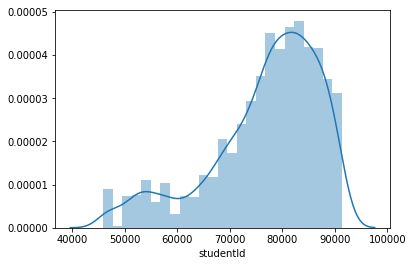

In [24]:
import seaborn as sns
%matplotlib inline

ax = sns.distplot(df_corr["studentId"])

In [25]:
df_corr["CICLO"]=(df_corr["Año"]-df_corr["Año"].min())+(df_corr["Mes"]/df_corr["Mes"].max())
df_corr.head()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,Año,Mes,Target,CICLO
0,45898.0,Mercadotecnia,2017 - 03,Si,65.598667,13.0,2.0,0.0,15.0,32.0,370.231250,11847.40,2017,3,1,0.375
1,45905.0,Intro. Fin,2017 - 03,No,86.482222,9.0,0.0,0.0,9.0,50.0,198.717400,9935.87,2017,3,0,0.375
2,45931.0,Direc. Proy.,2017 - 03,No,63.196667,12.0,2.0,1.0,15.0,22.0,294.535909,6479.79,2017,3,0,0.375
3,46063.0,Comp. Dig. Docentes,2017 - 03,Si,84.988333,8.0,0.0,4.0,12.0,29.0,471.421379,13671.22,2017,3,1,0.375
4,46106.0,Gest. Esc.,2017 - 03,Si,68.542667,11.0,3.0,1.0,15.0,31.0,306.023226,9486.72,2017,3,1,0.375


In [26]:
df_corr.corr()

,studentId,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,Año,Mes,Target,CICLO
studentId,1.000000,-0.049733,0.126837,0.080885,-0.054803,0.245032,-0.057277,0.061247,-0.019403,0.855830,0.438409,-0.061640,0.980163
Calificacion_Promedio,-0.049733,1.000000,0.753701,-0.898513,-0.062307,-0.110413,0.588409,0.038412,0.476329,-0.030236,-0.053610,0.552986,-0.051238
Tareas_Puntuales,0.126837,0.753701,1.000000,-0.662619,-0.138629,0.464040,0.462821,0.132107,0.451852,0.120883,0.021696,0.427524,0.120918
Tareas_No_Entregadas,0.080885,-0.898513,-0.662619,1.000000,0.031142,0.338991,-0.517712,-0.024078,-0.412987,0.069414,0.045285,-0.468256,0.083736
Tareas_Retrasadas,-0.054803,-0.062307,-0.138629,0.031142,1.000000,0.062143,-0.084809,0.022031,-0.056462,-0.056421,-0.016691,-0.100684,-0.059298
Total_Tareas,0.245032,-0.110413,0.464040,0.338991,0.062143,1.000000,-0.037221,0.143959,0.077542,0.223673,0.077369,-0.027177,0.239955
Dias_Conectado,-0.057277,0.588409,0.462821,-0.517712,-0.084809,-0.037221,1.000000,-0.108876,0.766813,-0.022317,-0.059949,0.597712,-0.046697
Minutos_Promedio,0.061247,0.038412,0.132107,-0.024078,0.022031,0.143959,-0.108876,1.000000,0.419386,0.042163,0.021863,-0.096152,0.048404
Minutos_Total,-0.019403,0.476329,0.451852,-0.412987,-0.056462,0.077542,0.766813,0.419386,1.000000,0.000568,-0.041540,0.414510,-0.017575
Año,0.855830,-0.030236,0.120883,0.069414,-0.056421,0.223673,-0.022317,0.042163,0.000568,1.000000,-0.049876,-0.047841,0.900359


In [28]:
df_corr.describe()

,studentId,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,Año,Mes,Target,CICLO
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.00000
mean,76826.320800,71.446212,8.826800,2.165200,0.182800,11.174800,49.085600,259.036880,12190.417404,2018.72880,5.274000,0.512000,2.38805
std,10531.545832,28.357020,4.105063,3.795428,0.651732,3.232031,33.072075,145.739734,9760.184061,0.56655,2.141579,0.499956,0.61442
min,45898.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2017.00000,1.000000,0.000000,0.37500
25%,71813.250000,65.667000,7.000000,0.000000,0.000000,9.000000,23.000000,158.080298,5080.940000,2019.00000,4.000000,0.000000,2.12500
50%,79062.500000,82.777083,9.000000,0.000000,0.000000,10.000000,42.000000,231.097917,10019.110000,2019.00000,6.000000,1.000000,2.62500
75%,84517.250000,90.748141,11.000000,2.000000,0.000000,13.000000,71.000000,332.742845,16644.392500,2019.00000,7.000000,1.000000,2.87500
max,91346.000000,100.000000,29.000000,34.000000,9.000000,34.000000,199.000000,1173.203571,107245.770000,2019.00000,8.000000,1.000000,3.00000


Borrando outliers <>4 std en calificacion promedio

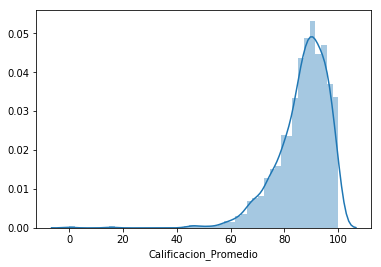

In [27]:
ax = sns.distplot(df_corr["Calificacion_Promedio"][(df_corr["Graduado"])=="Si"])

In [53]:
df_corr[  (df_corr["Calificacion_Promedio"]<70) &  (df_corr["Graduado"]=="Si") ]

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,Año,Mes,Target,CICLO
0,45898.0,Mercadotecnia,2017 - 03,Si,65.598667,13.0,2.0,0.0,15.0,32.0,370.231250,11847.40,2017,3,1,0.375
4,46106.0,Gest. Esc.,2017 - 03,Si,68.542667,11.0,3.0,1.0,15.0,31.0,306.023226,9486.72,2017,3,1,0.375
8,46374.0,Educacion,2017 - 03,Si,66.833333,8.0,3.0,1.0,12.0,35.0,273.005429,9555.19,2017,3,1,0.375
40,47679.0,Intro. Fin,2017 - 04,Si,67.037778,9.0,0.0,0.0,9.0,35.0,105.220000,3682.70,2017,4,1,0.500
48,50013.0,Planeacion Estrat.,2017 - 05,Si,67.272727,9.0,2.0,0.0,11.0,11.0,59.596364,655.56,2017,5,1,0.625
236,58642.0,Hab. Geren.,2018 - 02,Si,61.852222,8.0,0.0,1.0,9.0,90.0,224.202556,20178.23,2018,2,1,1.250
252,60542.0,Estrat. Comercial,2018 - 03,Si,0.000000,0.0,10.0,0.0,10.0,17.0,154.070588,2619.20,2018,3,1,1.375
391,66818.0,Gest. Tal.,2018 - 07,Si,69.620909,10.0,1.0,0.0,11.0,30.0,360.513667,10815.41,2018,7,1,1.875
395,66911.0,Gest. Tal.,2018 - 07,Si,68.030909,8.0,3.0,0.0,11.0,93.0,284.252473,26435.48,2018,7,1,1.875
472,68807.0,Direc. Estrat. Neg,2018 - 08,Si,69.697273,9.0,2.0,0.0,11.0,58.0,115.929483,6723.91,2018,8,1,2.000


In [29]:
reds = df_corr["reducido"].value_counts()
reds

Alim. Y Nut. Salud      263
Direc. Proy.            154
Educacion               132
Est. Temprana           115
Big Data                 96
Hab. Geren.              85
E. Lectoescritura        79
Mercadotecnia            68
Planeacion Estrat.       66
Lider. Inst. Edu.        64
Comp. Directivas         62
Intro. Fin               57
Ventas Estrat.           56
Admon Fin.               52
Mkt. Digital             49
Edu. Preescolar          46
Adm. Salud               42
Neuromarketing           42
Prof. Deportiva.         42
Coaching de Vida         39
Gest. Esc.               38
B. I.                    37
Gest. Tal.               37
Direc. Estrat. Neg       35
Programacion de Apps     35
Diagn. Psicoped.         35
Interv. Psicoped         34
Inn. Tec. Edu.           33
Crianza Hijos            31
Comp. Dig. Docentes      30
                       ... 
Efect. Cap. Hum.          6
Cloud Computing           6
Hist. Arte. Medieval      5
Marca Personal            5
Ciberseguridad      

In [30]:
d="Si"
std=df_corr[(df_corr["Graduado"]==d)]["Calificacion_Promedio"].std()
mean = df_corr[(df_corr["Graduado"]==d)]["Calificacion_Promedio"].mean()
print(std)
print(mean)

#df_corr = df_corr.drop(df_corr[(df_corr["Graduado"]=="Si")&(df_corr["Calificacion_Promedio"]<(mean-3*std))].index)
#df_corr[(df_corr["Graduado"]=="Si")]["Calificacion_Promedio"].mean()


9.67292093249509
86.75224448910093


In [32]:
df_corr[(df_corr["Graduado"]=="Si")]["reducido"].value_counts()

Alim. Y Nut. Salud       125
Direc. Proy.              97
Educacion                 72
Est. Temprana             67
Big Data                  54
Hab. Geren.               44
Comp. Directivas          38
Planeacion Estrat.        36
Lider. Inst. Edu.         35
Adm. Salud                33
Mercadotecnia             31
E. Lectoescritura         31
Edu. Preescolar           28
Ventas Estrat.            28
Gest. Tal.                27
B. I.                     26
Admon Fin.                26
Interv. Psicoped          25
Intro. Fin                23
Mkt. Digital              23
Diagn. Psicoped.          21
Neuromarketing            19
Psicoped. Escolar         18
Comp. Dig. Docentes       17
Inn. Tec. Edu.            17
Gest. Esc.                17
Trastornos Alimen.        15
Prof. Deportiva.          14
Direc. Estrat. Neg        14
Crianza Hijos             13
                        ... 
Calidad Educativa          6
Inc. Edu.                  6
Bien. Salud y Calidad      6
Com. Corp.    

In [33]:
df_corr.shape

(2500, 16)

In [34]:
std=df_corr[(df_corr["Graduado"]=="Si")]["Tareas_Retrasadas"].std()
mean = df_corr[(df_corr["Graduado"]=="Si")]["Tareas_Retrasadas"].mean()
#print(str(std)+" "+str(mean))

### pegar columnas orden materias

In [35]:
dfM = df_corr.copy()
dfM.head()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,Año,Mes,Target,CICLO
0,45898.0,Mercadotecnia,2017 - 03,Si,65.598667,13.0,2.0,0.0,15.0,32.0,370.231250,11847.40,2017,3,1,0.375
1,45905.0,Intro. Fin,2017 - 03,No,86.482222,9.0,0.0,0.0,9.0,50.0,198.717400,9935.87,2017,3,0,0.375
2,45931.0,Direc. Proy.,2017 - 03,No,63.196667,12.0,2.0,1.0,15.0,22.0,294.535909,6479.79,2017,3,0,0.375
3,46063.0,Comp. Dig. Docentes,2017 - 03,Si,84.988333,8.0,0.0,4.0,12.0,29.0,471.421379,13671.22,2017,3,1,0.375
4,46106.0,Gest. Esc.,2017 - 03,Si,68.542667,11.0,3.0,1.0,15.0,31.0,306.023226,9486.72,2017,3,1,0.375


In [36]:
df_orden_materias.head()

,reducido,2017 - 03,2017 - 04,2017 - 05,2017 - 06,2017 - 07,2017 - 08,2018 - 01,2018 - 02,2018 - 03,...,2019 - 05,2019 - 06,2019 - 07,2019 - 08,2020 - 01,2020 - 02,2020 - 03,2020 - 04,2020 - 05,2020 - 06
0,Act. Derecho Contratual,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Sin clase,Sin clase,Sin clase,Sin clase,Consentimiento y objeto digital contractual,Métodos alternos de resolución de controversias,Nueva clasificación contractual,Nuevo derecho probatorio documental,Contratos inteligentes,Consentimiento y objeto digital contractual
1,Adm. Emp.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...
2,Adm. Riesgos,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones
3,Adm. Salud,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Calidad en salud,Contabilidad Financiera y Presupuestos,Administración de costos,Salud pública,Planeación estratégica en salud,Calidad en salud,Contabilidad Financiera y Presupuestos,Planeación estratégica en salud,Salud pública,Planeación estratégica en salud
4,Admon Fin.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...


In [42]:
def om(X):
    o = [
    ('Alim. Y Nut. Salud', 'BSN'),
    ('Direc. Proy.','AN' ),
    ('Educacion', 'EDU'),
    ('Est. Temprana', 'EDU'),
    ('Big Data', 'TI'),
    ('Hab. Geren.', 'AN'),
    ('E. Lectoescritura','EDU' ),
    ('Mercadotecnia', 'MER'),
    ('Planeacion Estrat.', 'AN'),
    ('Lider. Inst. Edu.','EDU' ),
    ('Comp. Directivas','AN' ),
    ('Intro. Fin', 'FZ'),
    ('Ventas Estrat.','AN' ),
    ('Admon Fin.','FZ' ),
    ('Mkt. Digital','MER' ),
    ('Edu. Preescolar', 'EDU'),
    ('Prof. Deportiva.','EDU' ),
    ('Neuromarketing', 'MER'),
    ('Adm. Salud', 'BSN'),
    ('Coaching de Vida', 'EDU'),
    ('Gest. Esc.', 'EDU'),
    ('Gest. Tal.', 'RH'),
    ('B. I.', 'TI'),
    ('Diagn. Psicoped.', 'EDU'),
    ('Programacion de Apps','TI' ),
    ('Direc. Estrat. Neg','AN' ),
    ('Interv. Psicoped','EDU' ),
    ('Inn. Tec. Edu.','EDU' ),
    ('Crianza Hijos', 'BSN'),
    ('Psicoped. Escolar', 'EDU'),
    ('Comp. Dig. Docentes','EDU' ),
    ('Adm. Emp.','AN' ),
    ('Fin. Corp. Avan.', 'FZ'),
    ('Des. Neg. y Empren.', 'AN'),
    ('Direc. Emp. Fam.', 'AN'),
    ('Trastornos Alimen.', 'BSN'),
    ('Inn. Negocios','AN' ),
    ('E-Commerce', 'FZ'),
    ('Design Think', 'AN'),
    ('Estrategia Tal. Hum.', 'RH'),
    ('Desarrollo Mot.', 'EDU'),
    ('Des. Cap. Hum.', 'RH'),
    ('Prog. Neuroling.', 'EDU'),
    ('Bien. Salud y Calidad', 'BSN'),
    ('Estrat. Comercial','AN' ),
    ('Psicopat. Adol.','BSN' ),
    ('Prin. Fiscales', 'FZ'),
    ('Com. Corp.', 'RH'),
    ('Calidad Educativa', 'EDU'),
    ('Inn. Diseno Edu.', 'EDU'),
    ('Obesidad. Inf.','BSN' ),
    ('P. Aux. Psic.','BSN' ),
    ('Prot. Datos. P', 'DER'),
    ('Mkt. Farmaceutico', 'MER'),
    ('Inc. Edu.', 'EDU'),
    ('Est. Prac. Edu.', 'EDU'),
    ('Interv. Edu.', 'EDU'),
    ('Efect. Cap. Hum.', 'RH'),
    ('Edu. Primaria','EDU' ),
    ('Cloud Computing', 'TI'),
    ('Hist. Arte. Medieval','AH' ),
    ('Mkt. Farmaceutico A.','TI' ),
    ('Blockchain', 'TI'),
    ('Ciberseguridad', 'TI'),
    ('Marca Personal', 'MER'),
    ('I. A.', 'TI'),
    ('Gob. Adm. P. E.', 'AN'),
    ('Dere. Sanitario','DER' ),
    ('Coaching Edu.', 'EDU'),
    ('Des. Videojuegos', 'TI'),
    ('Adm. Riesgos','AN' ),
    ('Comp. Doc. S XXI', 'AH'),
    ('Exp. Clin. Elec.', 'BSN'),
    ('Oren. Edu. Fam', 'EDU'),
    ('Big Data en Edu', 'EDU'),
    ('Lit. Lat. S. XX', 'AH'),
    ('Precios Transf.', 'FZ'),
    ('Fintech','FZ' ),
    ('Hist. Arte. Clasico','AH' ),
    ('Eco. Digital', 'AN'),
    ('Inv. Mercados', 'FZ'),
    ('Hist. Arte. Ant.','AH' ),
    ('Bus. Analytics', 'AN'),
    ('Neg. Dig. Y Eco. C.', 'AN'),
    ('Inclusion Laboral', 'RH'),
    ('Disc. Formativa','EDU' ),
    ('Transf. Globales', 'AN'),
    ('Monitores Esc.', 'EDU')]
    r = X.reducido
    c = X.ciclo
    for a,b in o:
        if r == a:
            return b
    return "Other"

In [44]:
Orgs = dfM.apply(om,axis=1)
Orgs.head()

0    MER
1     FZ
2     AN
3    EDU
4    EDU
dtype: object

In [47]:
dfM["Org"] = Orgs
dfM.head()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,Año,Mes,Target,CICLO,Org
0,45898.0,Mercadotecnia,2017 - 03,Si,65.598667,13.0,2.0,0.0,15.0,32.0,370.231250,11847.40,2017,3,1,0.375,MER
1,45905.0,Intro. Fin,2017 - 03,No,86.482222,9.0,0.0,0.0,9.0,50.0,198.717400,9935.87,2017,3,0,0.375,FZ
2,45931.0,Direc. Proy.,2017 - 03,No,63.196667,12.0,2.0,1.0,15.0,22.0,294.535909,6479.79,2017,3,0,0.375,AN
3,46063.0,Comp. Dig. Docentes,2017 - 03,Si,84.988333,8.0,0.0,4.0,12.0,29.0,471.421379,13671.22,2017,3,1,0.375,EDU
4,46106.0,Gest. Esc.,2017 - 03,Si,68.542667,11.0,3.0,1.0,15.0,31.0,306.023226,9486.72,2017,3,1,0.375,EDU


In [51]:
dfM[["Org","reducido"]].tail(10)

,Org,reducido
2490,AN,Comp. Directivas
2491,TI,I. A.
2492,RH,Com. Corp.
2493,EDU,Est. Prac. Edu.
2494,DER,Prot. Datos. P
2495,AN,Adm. Emp.
2496,TI,I. A.
2497,EDU,Gest. Esc.
2498,EDU,Gest. Esc.
2499,BSN,Psicopat. Adol.


In [54]:
dfM["Org"].value_counts()

EDU    815
AN     605
BSN    414
TI     197
FZ     176
MER    173
RH      92
DER     14
AH      14
Name: Org, dtype: int64

### Manejando variables Categoricas

Como se menciono antes, los computadores no son buenos con las variables categoricas.

Mientras que nosotros entendemos bien las variables categoricas, es debido a un conocimiento previo quie el computador no tiene.

La mayoria de tecnicas de Machine Learning y modelso trabajan con un set limitado de datos (Tipicamente binario). 

Las redes neurales consumenda data y producen resultados en el rango de 0..1 t raramente van mas alla del alcance.

En resumen, la gran mayoria de algoritmos de machine learning aceptan data de entrada  ("training data") de donde los features son extraidos.

Basado en estos features, un modelo matematico es creado, el cual es usado para hacer una predicción o decision sin ser programado explicitamente para esa tarea.

Dado un dataset con con 2 features, vamos a dejar que encoder encuentre los valores unicos por features y transforme la data a binario usando la tecnica one-hot encoding.

In [56]:
df2X = dfM.drop(columns=["studentId","reducido","Target"])
df2X.head()

,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,Año,Mes,CICLO,Org
0,2017 - 03,Si,65.598667,13.0,2.0,0.0,15.0,32.0,370.231250,11847.40,2017,3,0.375,MER
1,2017 - 03,No,86.482222,9.0,0.0,0.0,9.0,50.0,198.717400,9935.87,2017,3,0.375,FZ
2,2017 - 03,No,63.196667,12.0,2.0,1.0,15.0,22.0,294.535909,6479.79,2017,3,0.375,AN
3,2017 - 03,Si,84.988333,8.0,0.0,4.0,12.0,29.0,471.421379,13671.22,2017,3,0.375,EDU
4,2017 - 03,Si,68.542667,11.0,3.0,1.0,15.0,31.0,306.023226,9486.72,2017,3,0.375,EDU


In [72]:
# Columnas One-hot-encoding del dataset usando el metodo de Pandas ``get_dummies``  (demontración)
df3 = pd.get_dummies(df2X, columns=['Org'])
df3.tail()

,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,...,CICLO,Org_AH,Org_AN,Org_BSN,Org_DER,Org_EDU,Org_FZ,Org_MER,Org_RH,Org_TI
2495,2019 - 08,No,71.818182,9.0,2.0,0.0,11.0,21.0,468.019048,9828.40,...,3.0,0,1,0,0,0,0,0,0,0
2496,2019 - 08,Si,81.333333,15.0,0.0,0.0,15.0,90.0,431.348000,38821.32,...,3.0,0,0,0,0,0,0,0,0,1
2497,2019 - 08,No,73.333333,9.0,0.0,0.0,9.0,27.0,171.675926,4635.25,...,3.0,0,0,0,0,1,0,0,0,0
2498,2019 - 08,Si,85.185556,9.0,0.0,0.0,9.0,102.0,256.105686,26122.78,...,3.0,0,0,0,0,1,0,0,0,0
2499,2019 - 08,No,80.159333,15.0,0.0,0.0,15.0,26.0,230.841538,6001.88,...,3.0,0,0,1,0,0,0,0,0,0


<hr>

## Entrenando un clasificador basado  en un Árbol de Decisión

### Seleccionando FEATURES y definiendo la variable TARGET

In [73]:
df3.columns

Index(['ciclo', 'Graduado', 'Calificacion_Promedio', 'Tareas_Puntuales',
       'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas',
       'Dias_Conectado', 'Minutos_Promedio', 'Minutos_Total', 'Año', 'Mes',
       'CICLO', 'Org_AH', 'Org_AN', 'Org_BSN', 'Org_DER', 'Org_EDU', 'Org_FZ',
       'Org_MER', 'Org_RH', 'Org_TI'],
      dtype='object')

In [537]:
dfN = df3.copy()

cont_cols = ['Calificacion_Promedio', 'Tareas_Puntuales',
       'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas',
       'Dias_Conectado', 'Minutos_Promedio', 'Minutos_Total', 'Año', 'Mes', 'CICLO']


f = dfN[cont_cols]
#features = dfN.drop(columns=cont_cols)
f= (f-f.mean())/f.std()

for c in f.columns:
    dfN[c] = f[c]

#features2=(features-features.mean())/features.std()
#features3=(features-features.min())/(features.max()-features.min())


features = dfN[
    ['Calificacion_Promedio', 
     'Tareas_Puntuales',
     'Tareas_No_Entregadas', 
#     'Tareas_Retrasadas', 
#     'Total_Tareas',
     'Dias_Conectado', 
#     'Minutos_Promedio', 
     'Minutos_Total', 
#     'Año', 'Mes',
     'CICLO', 'Org_AH', 'Org_AN', 'Org_BSN', 'Org_DER', 'Org_EDU', 'Org_FZ',
     'Org_MER', 'Org_RH', 'Org_TI']
]
target = df3['Graduado']  ## No cambie la variable target!



In [538]:
features.head()

,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Dias_Conectado,Minutos_Total,CICLO,Org_AH,Org_AN,Org_BSN,Org_DER,Org_EDU,Org_FZ,Org_MER,Org_RH,Org_TI
0,-0.206212,1.016598,-0.043526,-0.516617,-0.035145,-3.276342,0,0,0,0,0,0,1,0,0
1,0.530239,0.042192,-0.570476,0.027649,-0.230994,-3.276342,0,0,0,0,0,1,0,0,0
2,-0.290917,0.772997,-0.043526,-0.818987,-0.585094,-3.276342,0,1,0,0,0,0,0,0,0
3,0.477558,-0.201410,-0.570476,-0.607328,0.151719,-3.276342,0,0,0,0,1,0,0,0,0
4,-0.102392,0.529395,0.219949,-0.546854,-0.277013,-3.276342,0,0,0,0,1,0,0,0,0


### Dividiendo nuestro dataset en set de Entrenamiento y Pruebas

In [539]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2 ,random_state=133)

### Haciendo predicciones del Sample Test

In [578]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#mlp = MLPClassifier(activation="logistic").fit(X_train,y_train)
rfc = RandomForestClassifier(random_state=1, n_estimators = 500, max_depth = 2).fit(X_train,y_train)


In [579]:
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))


#y_pred2 = mlp.predict(X_test)
#print(classification_report(y_test,y_pred2))


              precision    recall  f1-score   support

          No       0.88      0.65      0.75       251
          Si       0.72      0.91      0.80       249

    accuracy                           0.78       500
   macro avg       0.80      0.78      0.78       500
weighted avg       0.80      0.78      0.78       500



### Analice la calidad del modelo a través de la matriz de confusión

Text(0.5, 15.0, 'Predicted label\n\nAccuracy=0.780\nPrecision=0.721\nRecall=0.912\nF1 Score=0.8049645390070922')

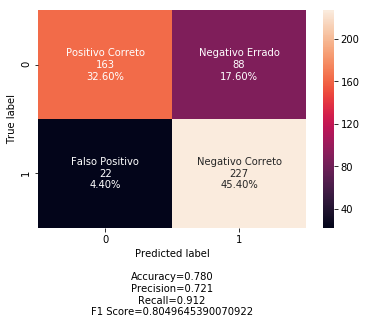

In [580]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#y_pred, y_test = rfc.predict(features), target
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['Positivo Correto', 'Negativo Errado', 'Falso Positivo', 'Negativo Correto']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
f1_score  = 2*precision*recall / (precision + recall)
sns.heatmap(cf_matrix, annot=labels, fmt="")
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={}".format(accuracy, precision, recall, f1_score)
plt.ylabel('True label')
plt.xlabel('Predicted label' + stats_text)

In [581]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
target = lb.fit_transform(target)

scores = cross_val_score(rfc, features, target, cv=10, scoring='recall')
scores.mean()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: Dat

0.89609375

In [573]:
print(y_pred)

['Si' 'Si' 'No' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si'
 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'No' 'No' 'No' 'No' 'Si' 'Si'
 'No' 'Si' 'No' 'Si' 'No' 'Si' 'No' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si'
 'Si' 'Si' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'Si'
 'Si' 'Si' 'No' 'Si' 'No' 'No' 'No' 'No' 'Si' 'Si' 'No' 'No' 'Si' 'Si'
 'Si' 'No' 'No' 'Si' 'No' 'Si' 'No' 'Si' 'Si' 'No' 'Si' 'Si' 'No' 'No'
 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'Si' 'No' 'No' 'Si' 'Si' 'No'
 'Si' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'No' 'Si'
 'Si' 'Si' 'No' 'No' 'Si' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'Si' 'Si' 'No'
 'Si' 'No' 'No' 'Si' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'No' 'Si' 'Si' 'No'
 'No' 'No' 'Si' 'Si' 'No' 'No' 'Si' 'Si' 'No' 'No' 'Si' 'Si' 'Si' 'Si'
 'No' 'No' 'No' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'No' 'Si'
 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'No'
 'Si' 'No' 'Si' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'No' 'Si' 'No' 'No' 'Si'
 'No' 

In [564]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.11.0)


<hr>

## Scoring de la data requerida para hacer la entrega de la solución

Para el envío, necesita clasificar el siguiente dataset. Para hacer eso, usted necesita reproducir los mismos pasos de pre-procesamiento para que el dataset este en la misma estructura del que usted uso para construir su modelo. Despues de clasificar este dataframe, esperamos que usted entregue un archivo csv con las 2499 filar y una columna 'Graduado' con su predicción. **No cambie el orden del archivo a predecir ni borre filas**

In [582]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/for_submission/ToBePredicted.csv
df_to_be_predicted = pd.read_csv(r'ToBePredicted.csv')
df_to_be_predicted.tail()

--2020-09-18 14:59:12--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/for_submission/ToBePredicted.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33892 (33K) [text/plain]
Saving to: ‘ToBePredicted.csv’

100%[======================================>] 33,892      --.-K/s   in 0.002s  

2020-09-18 14:59:12 (21.3 MB/s) - ‘ToBePredicted.csv’ saved [33892/33892]



,studentId,reducido,ciclo
995,79594.0,Diagn. Psicoped.,2019 - 05
996,69470.0,Ventas Estrat.,2018 - 08
997,72921.0,Big Data,2019 - 02
998,80608.0,Interv. Psicoped,2019 - 05
999,86966.0,Interv. Psicoped,2019 - 07


In [585]:
# Uniendo los dataset
df = pd.merge(
    df_to_be_predicted, df_tabla_tareas, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)
df = pd.merge(
    df, df_tabla_conexiones, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)

# Eliminando la columna 'reducido'
#df2 = df.drop(columns=['reducido'], inplace=False)

# Columnas One-hot-encoding del dataset usando el metodo de Pandas ``get_dummies``  (demontración)
#df3 = pd.get_dummies(df2, columns=['ciclo'])
df3=df.copy()
df3.tail()

,studentId,reducido,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total
995,91291.0,Trastornos Alimen.,2019 - 08,0.000,0.0,12.0,0.0,12.0,3.0,25.723333,77.17
996,91312.0,Marca Personal,2019 - 08,76.580,5.0,0.0,0.0,5.0,41.0,154.851951,6348.93
997,91329.0,Adm. Salud,2019 - 08,86.410,13.0,0.0,0.0,13.0,36.0,421.847222,15186.50
998,91345.0,Direc. Proy.,2019 - 08,0.000,0.0,9.0,0.0,9.0,6.0,14.650000,87.90
999,91437.0,Des. Neg. y Empren.,2019 - 08,75.024,15.0,0.0,0.0,15.0,42.0,112.868333,4740.47


In [586]:
df3.isnull().sum()

studentId                0
reducido                 0
ciclo                    0
Calificacion_Promedio    0
Tareas_Puntuales         0
Tareas_No_Entregadas     0
Tareas_Retrasadas        0
Total_Tareas             0
Dias_Conectado           0
Minutos_Promedio         0
Minutos_Total            0
dtype: int64

In [587]:
import numpy as np

def ciclo(X):
    x = int(X[0:4])
    y = int(X[7:])
    return [x,y]
ns = []
for x in df3["ciclo"]:
    ns.append(ciclo(x))
data = np.array(ns)
dataset = pd.DataFrame({'Año': data[:, 0], 'Mes': data[:, 1]})


df3["Año"] = dataset["Año"]
df3["Mes"] = dataset["Mes"]
df3.head()

,studentId,reducido,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,Año,Mes
0,46345.0,Direc. Proy.,2017 - 04,76.111111,9.0,0.0,0.0,9.0,34.0,327.384412,11131.07,2017,4
1,46403.0,Educacion,2017 - 03,0.000000,1.0,11.0,0.0,12.0,3.0,387.276667,1161.83,2017,3
2,46477.0,Planeacion Estrat.,2017 - 03,81.666667,12.0,2.0,1.0,15.0,36.0,556.360000,20028.96,2017,3
3,46662.0,Hab. Geren.,2017 - 03,81.952667,13.0,2.0,0.0,15.0,30.0,514.689000,15440.67,2017,3
4,46774.0,Educacion,2017 - 04,81.917000,9.0,1.0,0.0,10.0,17.0,43.938235,746.95,2017,4


In [588]:
df4 = df3.copy()
df4["CICLO"]=(df4["Año"]-df4["Año"].min())+(df4["Mes"]/df4["Mes"].max())


Orgs = df4.apply(om,axis=1)
Orgs.head()


0     AN
1    EDU
2     AN
3     AN
4    EDU
dtype: object

In [590]:
df4["Org"] = Orgs
df4.head(15)

,studentId,reducido,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,Año,Mes,CICLO,Org
0,46345.0,Direc. Proy.,2017 - 04,76.111111,9.0,0.0,0.0,9.0,34.0,327.384412,11131.07,2017,4,0.500,AN
1,46403.0,Educacion,2017 - 03,0.000000,1.0,11.0,0.0,12.0,3.0,387.276667,1161.83,2017,3,0.375,EDU
2,46477.0,Planeacion Estrat.,2017 - 03,81.666667,12.0,2.0,1.0,15.0,36.0,556.360000,20028.96,2017,3,0.375,AN
3,46662.0,Hab. Geren.,2017 - 03,81.952667,13.0,2.0,0.0,15.0,30.0,514.689000,15440.67,2017,3,0.375,AN
4,46774.0,Educacion,2017 - 04,81.917000,9.0,1.0,0.0,10.0,17.0,43.938235,746.95,2017,4,0.500,EDU
5,46819.0,Intro. Fin,2017 - 03,71.295556,8.0,1.0,0.0,9.0,9.0,216.010000,1944.09,2017,3,0.375,FZ
6,47027.0,Educacion,2017 - 04,83.167000,9.0,1.0,0.0,10.0,26.0,131.541154,3420.07,2017,4,0.500,EDU
7,47160.0,Gest. Esc.,2017 - 04,0.833333,1.0,11.0,0.0,12.0,5.0,35.228000,176.14,2017,4,0.500,EDU
8,47497.0,Hab. Geren.,2017 - 04,11.111111,1.0,8.0,0.0,9.0,8.0,664.641250,5317.13,2017,4,0.500,AN
9,47708.0,Direc. Proy.,2017 - 04,37.036667,4.0,5.0,0.0,9.0,9.0,139.861111,1258.75,2017,4,0.500,AN


In [594]:
df5 = df4.drop(columns=["studentId","reducido"])


df5 = pd.get_dummies(df4, columns=['Org'])
df5.head()

,studentId,reducido,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,...,CICLO,Org_AH,Org_AN,Org_BSN,Org_DER,Org_EDU,Org_FZ,Org_MER,Org_RH,Org_TI
0,46345.0,Direc. Proy.,2017 - 04,76.111111,9.0,0.0,0.0,9.0,34.0,327.384412,...,0.500,0,1,0,0,0,0,0,0,0
1,46403.0,Educacion,2017 - 03,0.000000,1.0,11.0,0.0,12.0,3.0,387.276667,...,0.375,0,0,0,0,1,0,0,0,0
2,46477.0,Planeacion Estrat.,2017 - 03,81.666667,12.0,2.0,1.0,15.0,36.0,556.360000,...,0.375,0,1,0,0,0,0,0,0,0
3,46662.0,Hab. Geren.,2017 - 03,81.952667,13.0,2.0,0.0,15.0,30.0,514.689000,...,0.375,0,1,0,0,0,0,0,0,0
4,46774.0,Educacion,2017 - 04,81.917000,9.0,1.0,0.0,10.0,17.0,43.938235,...,0.500,0,0,0,0,1,0,0,0,0


In [593]:
dfNS = df5.copy()

cont_cols = ['Calificacion_Promedio', 'Tareas_Puntuales',
       'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas',
       'Dias_Conectado', 'Minutos_Promedio', 'Minutos_Total', 'Año', 'Mes', 'CICLO']


f = dfNS[cont_cols]
#features = dfN.drop(columns=cont_cols)
f= (f-f.mean())/f.std()

for c in f.columns:
    dfNS[c] = f[c]

dfNS.head()

,studentId,reducido,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,...,CICLO,Org_AH,Org_AN,Org_BSN,Org_DER,Org_EDU,Org_FZ,Org_MER,Org_RH,Org_TI
0,46345.0,Direc. Proy.,2017 - 04,0.195518,0.067006,-0.594708,-0.261603,-0.677773,-0.466127,0.461465,...,-3.091868,0,1,0,0,0,0,0,0,0
1,46403.0,Educacion,2017 - 03,-2.494241,-1.978993,2.329648,-0.261603,0.271489,-1.402187,0.857332,...,-3.296763,0,0,0,0,1,0,0,0,0
2,46477.0,Planeacion Estrat.,2017 - 03,0.391850,0.834256,-0.063007,1.304882,1.220750,-0.405736,1.974916,...,-3.296763,0,1,0,0,0,0,0,0,0
3,46662.0,Hab. Geren.,2017 - 03,0.401958,1.090006,-0.063007,-0.261603,1.220750,-0.586909,1.699485,...,-3.296763,0,1,0,0,0,0,0,0,0
4,46774.0,Educacion,2017 - 04,0.400697,0.067006,-0.328857,-0.261603,-0.361352,-0.979450,-1.412019,...,-3.091868,0,0,0,0,1,0,0,0,0


In [595]:
fS = dfNS[
    ['Calificacion_Promedio', 
     'Tareas_Puntuales',
     'Tareas_No_Entregadas', 
#     'Tareas_Retrasadas', 
#     'Total_Tareas',
     'Dias_Conectado', 
#     'Minutos_Promedio', 
     'Minutos_Total', 
#     'Año', 'Mes',
     'CICLO', 'Org_AH', 'Org_AN', 'Org_BSN', 'Org_DER', 'Org_EDU', 'Org_FZ',
     'Org_MER', 'Org_RH', 'Org_TI']
]
fS.head()

,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Dias_Conectado,Minutos_Total,CICLO,Org_AH,Org_AN,Org_BSN,Org_DER,Org_EDU,Org_FZ,Org_MER,Org_RH,Org_TI
0,0.195518,0.067006,-0.594708,-0.466127,-0.086897,-3.091868,0,1,0,0,0,0,0,0,0
1,-2.494241,-1.978993,2.329648,-1.402187,-1.085053,-3.296763,0,0,0,0,1,0,0,0,0
2,0.391850,0.834256,-0.063007,-0.405736,0.803992,-3.296763,0,1,0,0,0,0,0,0,0
3,0.401958,1.090006,-0.063007,-0.586909,0.344596,-3.296763,0,1,0,0,0,0,0,0,0
4,0.400697,0.067006,-0.328857,-0.979450,-1.126592,-3.091868,0,0,0,0,1,0,0,0,0


In [597]:
fS.shape

(1000, 15)

In [ ]:
df2N = df.drop(columns=['reducido'], inplace=False)

def ciclo(X):
    x = int(X[0:4])
    y = int(X[7:])
    return [x,y]
ns = []
for x in df2["ciclo"]:
    ns.append(ciclo(x))
data = np.array(ns)
dataset = pd.DataFrame({'Año': data[:, 0], 'Mes': data[:, 1]})
df2 = df2.join(dataset)
df2.head()


In [ ]:

colsT = ["Tareas_Puntuales", "Tareas_No_Entregadas","Tareas_Retrasadas"]
for c in colsT:
    df2[c]= df2[c]/df2["Total_Tareas"]
df2.head()



In [ ]:
df2=df2.drop(columns=["Tareas_Retrasadas","Total_Tareas","ciclo","studentId"])
df2.head()



In [ ]:
features = df2[
    ['Calificacion_Promedio', 'Tareas_Puntuales',
       'Tareas_No_Entregadas', 'Dias_Conectado', 'Minutos_Promedio',
       'Minutos_Total', 'Año', 'Mes']
]

features2=(features-features.mean())/features.std()
features2

Observando los features declarados acontinuación, sabemos que el dataset ha ser evaluado esta en el mismo formato usado para entrenar nuestro árbol de decisión anteriormente.

```features = df3[
    [
        'studentId', 'Calificacion_Promedio', 'Tareas_Puntuales',
        'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas',
        'ciclo_2017 - 03', 'ciclo_2017 - 04', 'ciclo_2017 - 05',
        'ciclo_2017 - 06', 'ciclo_2017 - 07', 'ciclo_2017 - 08',
        'ciclo_2018 - 01', 'ciclo_2018 - 02', 'ciclo_2018 - 03',
        'ciclo_2018 - 04', 'ciclo_2018 - 05', 'ciclo_2018 - 06',
        'ciclo_2018 - 07', 'ciclo_2018 - 08', 'ciclo_2019 - 01',
        'ciclo_2019 - 02', 'ciclo_2019 - 03', 'ciclo_2019 - 04',
        'ciclo_2019 - 05', 'ciclo_2019 - 06', 'ciclo_2019 - 07',
        'ciclo_2019 - 08'
    ]
]
target = df3['Graduado']  ## No cambie la variable target!```

In [598]:
y_pred = rfc.predict(fS)
print(y_pred)

['Si' 'No' 'Si' 'Si' 'No' 'No' 'No' 'No' 'No' 'No' 'Si' 'Si' 'No' 'Si'
 'Si' 'No' 'No' 'Si' 'Si' 'Si' 'No' 'No' 'Si' 'No' 'No' 'Si' 'Si' 'Si'
 'No' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'No' 'No' 'No' 'Si' 'Si' 'Si' 'Si'
 'Si' 'Si' 'Si' 'Si' 'No' 'No' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'No'
 'No' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si'
 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'Si' 'No' 'Si' 'No'
 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'Si' 'No' 'Si' 'No' 'No' 'Si' 'Si' 'No'
 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'Si' 'No' 'Si'
 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'No' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si'
 'No' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'Si' 'Si'
 'Si' 'No' 'No' 'Si' 'Si' 'No' 'Si' 'No' 'No' 'No' 'No' 'Si' 'Si' 'Si'
 'Si' 'Si' 'Si' 'Si' 'Si' 'No' 'No' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'No'
 'No' 'No' 'No' 'No' 'Si' 'Si' 'Si' 'Si' 'No' 'No' 'No' 'Si' 'Si' 'No'
 'No' 'No' 'Si' 'No' 'Si' 'No' 'Si' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'No'
 'Si' 

In [599]:
pd.Series(y_pred).value_counts()

Si    641
No    359
dtype: int64

### Guardando los resultados de la predicción en un archivo csv

In [601]:
df_to_be_predicted["TARGET"]=y_pred
df_to_be_predicted.head()

,studentId,reducido,ciclo,TARGET
0,69195.0,Admon Fin.,2018 - 08,Si
1,65627.0,Direc. Proy.,2018 - 06,No
2,86643.0,Inn. Diseno Edu.,2019 - 07,Si
3,80610.0,Alim. Y Nut. Salud,2019 - 05,Si
4,85524.0,Hab. Geren.,2019 - 07,No


In [604]:
df_to_be_predicted["TARGET"()

SyntaxError: unexpected EOF while parsing (<ipython-input-604-97f6086efe0f>, line 1)

In [ ]:
np.savetxt("results.csv", y_pred, delimiter=",", fmt='%s')

In [ ]:
project.save_data(file_name="results.csv", data=pd.read_csv("results.csv", header=None).to_csv(header=["TARGET"], index=False))

<hr>

## ¡Felicitaciones!

Si todo fue ejecutado sin errores, usted ya tiene un modelo basado en classificacion binaria y puede descargar sus resultados para subirlos como csv!

Para enviar su solución, ve a la página:

# https://anahuac.maratona.dev
